# to study the effects of markdowns on holiday weeks

In [6]:
### Import the required packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [7]:
df= pd.read_csv("Sales Prediction datasets.csv")

In [8]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
df = df.drop(["Date"],axis=1)

In [60]:
df.info()  #as can be seen a lot of null datas are there, labeled as NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Temperature   8190 non-null   float64
 2   Fuel_Price    8190 non-null   float64
 3   MarkDown1     8190 non-null   float64
 4   MarkDown2     8190 non-null   float64
 5   MarkDown3     8190 non-null   float64
 6   MarkDown4     8190 non-null   float64
 7   MarkDown5     8190 non-null   float64
 8   CPI           8190 non-null   float64
 9   Unemployment  8190 non-null   float64
 10  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 648.0 KB


<AxesSubplot:>

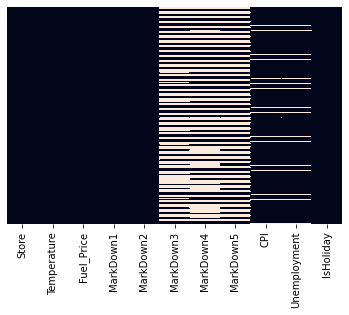

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  

# CLEANSING THE DATA 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MarkDown1', ylabel='Density'>

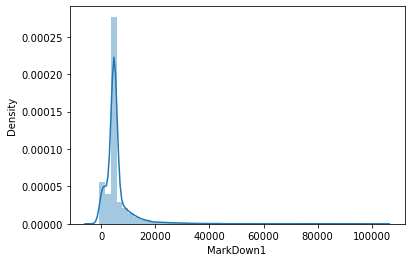

In [22]:
sns.distplot(df.MarkDown1)  

<AxesSubplot:xlabel='MarkDown1'>

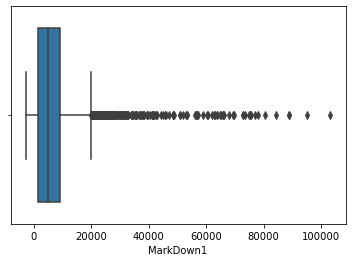

In [13]:
sns.boxplot(x="MarkDown1",data=df)  # a lot of outliers here..

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #since,there a lot of outliers,
                                                                  #its better to go with median than mean
df.MarkDown1 = imputer.fit_transform(df['MarkDown1'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,38.51,2.548,4743.58,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,39.93,2.514,4743.58,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,46.63,2.561,4743.58,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,46.50,2.625,4743.58,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MarkDown2', ylabel='Density'>

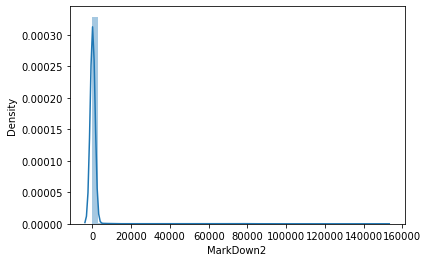

In [43]:
sns.distplot(df.MarkDown2) 

<AxesSubplot:xlabel='MarkDown2'>

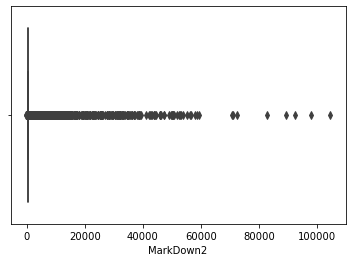

In [25]:
sns.boxplot(x="MarkDown2",data=df)  # a lot of outliers here..

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #since,there a lot of outliers,
                                                                  #its better to go with median than mean
df.MarkDown2 = imputer.fit_transform(df['MarkDown2'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,364.57,NaN,NaN,NaN,211.096358,8.106,False
1,1,38.51,2.548,4743.58,364.57,NaN,NaN,NaN,211.242170,8.106,True
2,1,39.93,2.514,4743.58,364.57,NaN,NaN,NaN,211.289143,8.106,False
3,1,46.63,2.561,4743.58,364.57,NaN,NaN,NaN,211.319643,8.106,False
4,1,46.50,2.625,4743.58,364.57,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MarkDown3', ylabel='Density'>

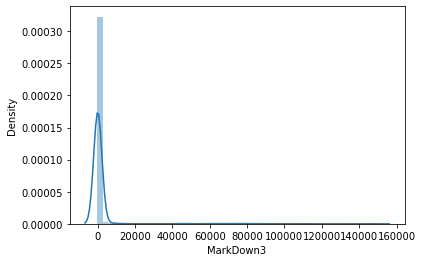

In [27]:
sns.distplot(df.MarkDown3)

<AxesSubplot:xlabel='MarkDown3'>

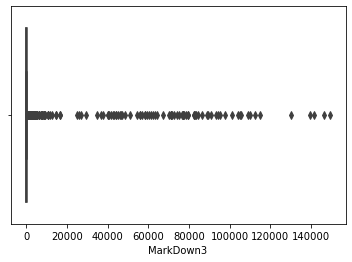

In [28]:
sns.boxplot(x="MarkDown3",data=df)  # a lot of outliers here..

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #since,there a lot of outliers,
                                                                  #its better to go with median than mean
df.MarkDown3 = imputer.fit_transform(df['MarkDown3'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,36.26,36.26,NaN,NaN,211.096358,8.106,False
1,1,38.51,2.548,4743.58,36.26,36.26,NaN,NaN,211.242170,8.106,True
2,1,39.93,2.514,4743.58,36.26,36.26,NaN,NaN,211.289143,8.106,False
3,1,46.63,2.561,4743.58,36.26,36.26,NaN,NaN,211.319643,8.106,False
4,1,46.50,2.625,4743.58,36.26,36.26,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,3.00,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,77.50,3.614,9090.48,582.74,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,79.37,3.614,3789.94,85.72,85.72,744.84,2150.36,NaN,NaN,False
8188,45,82.84,3.737,2961.49,204.19,204.19,363.00,1059.46,NaN,NaN,False


<AxesSubplot:xlabel='MarkDown4'>

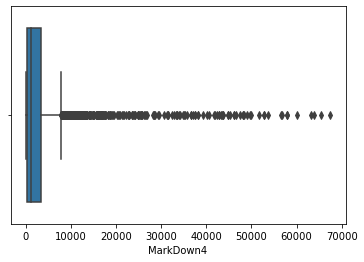

In [31]:
sns.boxplot(x="MarkDown4",data=df)  # a lot of outliers here..

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #since,there a lot of outliers,
                                                                  #its better to go with median than mean
df.MarkDown4 = imputer.fit_transform(df['MarkDown4'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,36.26,36.26,1176.425,NaN,211.096358,8.106,False
1,1,38.51,2.548,4743.58,36.26,36.26,1176.425,NaN,211.242170,8.106,True
2,1,39.93,2.514,4743.58,36.26,36.26,1176.425,NaN,211.289143,8.106,False
3,1,46.63,2.561,4743.58,36.26,36.26,1176.425,NaN,211.319643,8.106,False
4,1,46.50,2.625,4743.58,36.26,36.26,1176.425,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,3.00,3.00,2449.970,3169.69,NaN,NaN,False
8186,45,77.50,3.614,9090.48,582.74,582.74,5797.470,1514.93,NaN,NaN,False
8187,45,79.37,3.614,3789.94,85.72,85.72,744.840,2150.36,NaN,NaN,False
8188,45,82.84,3.737,2961.49,204.19,204.19,363.000,1059.46,NaN,NaN,False


<AxesSubplot:xlabel='MarkDown5'>

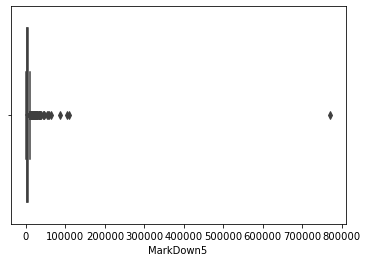

In [33]:
sns.boxplot(x="MarkDown5",data=df)  # a lot of outliers here..

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #since,there a lot of outliers,
                                                                  #its better to go with median than mean
df.MarkDown5 = imputer.fit_transform(df['MarkDown5'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,36.26,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,38.51,2.548,4743.58,36.26,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,39.93,2.514,4743.58,36.26,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,46.63,2.561,4743.58,36.26,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,46.50,2.625,4743.58,36.26,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,3.00,3.00,2449.970,3169.690,NaN,NaN,False
8186,45,77.50,3.614,9090.48,582.74,582.74,5797.470,1514.930,NaN,NaN,False
8187,45,79.37,3.614,3789.94,85.72,85.72,744.840,2150.360,NaN,NaN,False
8188,45,82.84,3.737,2961.49,204.19,204.19,363.000,1059.460,NaN,NaN,False


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

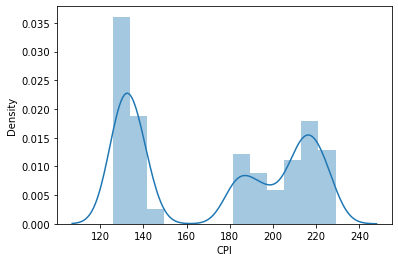

In [40]:
sns.distplot(df.CPI)

<AxesSubplot:xlabel='CPI'>

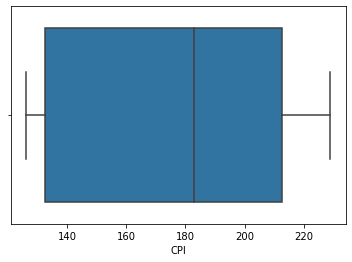

In [41]:
sns.boxplot(x="CPI",data=df) 

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') #as the data is not much skewed or has many outliers,
                                                                  #we can go ahead with mean
df.CPI = imputer.fit_transform(df['CPI'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,36.26,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,38.51,2.548,4743.58,36.26,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,39.93,2.514,4743.58,36.26,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,46.63,2.561,4743.58,36.26,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,46.50,2.625,4743.58,36.26,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,3.00,3.00,2449.970,3169.690,182.764003,NaN,False
8186,45,77.50,3.614,9090.48,582.74,582.74,5797.470,1514.930,182.764003,NaN,False
8187,45,79.37,3.614,3789.94,85.72,85.72,744.840,2150.360,182.764003,NaN,False
8188,45,82.84,3.737,2961.49,204.19,204.19,363.000,1059.460,182.764003,NaN,False


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

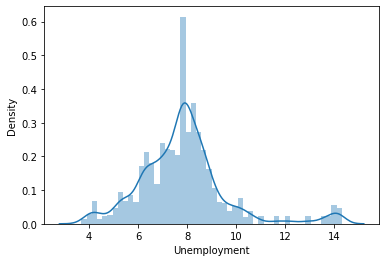

In [50]:
sns.distplot(df.Unemployment)  # a little skewed

<AxesSubplot:xlabel='Unemployment'>

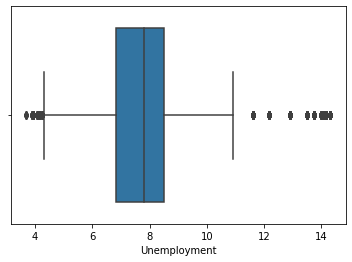

In [48]:
sns.boxplot(x="Unemployment",data=df) #a few outliers are present

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median') # as there are a few outliers and the data is a little skewed,
                                                                  # we'll go with median to replace the null values
df.Unemployment = imputer.fit_transform(df['Unemployment'].values.reshape(-1,1))[:,0]
 
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,4743.58,36.26,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,38.51,2.548,4743.58,36.26,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,39.93,2.514,4743.58,36.26,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,46.63,2.561,4743.58,36.26,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,46.50,2.625,4743.58,36.26,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,3.00,3.00,2449.970,3169.690,182.764003,7.806,False
8186,45,77.50,3.614,9090.48,582.74,582.74,5797.470,1514.930,182.764003,7.806,False
8187,45,79.37,3.614,3789.94,85.72,85.72,744.840,2150.360,182.764003,7.806,False
8188,45,82.84,3.737,2961.49,204.19,204.19,363.000,1059.460,182.764003,7.806,False


<AxesSubplot:>

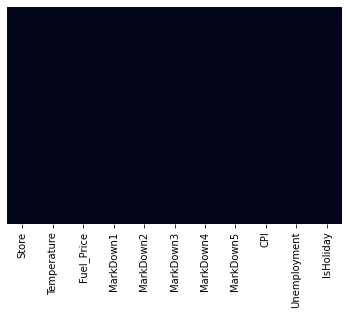

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) # no-null values now.

In [57]:
IsHoliday = pd.get_dummies(df["IsHoliday"],drop_first=True)
IsHoliday.head()

,True
0,0
1,1
2,0
3,0
4,0
